# 01. Image Preprocessing

### Imports

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sys import getsizeof
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array

### Paths

In [35]:
BASE_PATH = 'E:\\07_Workspaces\\01_Python\\03_ML\\EBR\\data'
ORIGINAL_IMAGES = f'{BASE_PATH}\\unsplit'
AUGMENTED_IMAGES = f'{ORIGINAL_IMAGES}\\aug'

### Image Augmentor

In [36]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1./255,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [37]:
CATEGORIES = os.listdir(ORIGINAL_IMAGES) # list the names of the categories that in my data
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

8 CATEGORIES are  ['Black_Hooded_Oriole', 'Common_Myna', 'Indian_Peafowl', 'Intermediate_Egret', 'Other', 'Red_Faced_Malkoha', 'Rose_Ringed_Parakeet', 'White_Throated_Kingfisher']


### Preparing the initial dataset

In [38]:
dataset = []

for category in CATEGORIES:
    cat_path = os.path.join(ORIGINAL_IMAGES, category)
    cat_num = CATEGORIES.index(category)
    for img_filename in os.listdir(cat_path):
        img = cv2.imread(os.path.join(cat_path, img_filename))
        dataset.append([img, cat_num])
#     break - then will only take the images from the first category

In [39]:
len(dataset)

896

### Calculating the optimum size for image resizing

In [40]:
sizes = np.zeros((len(dataset),2))
for _idx, _data in enumerate(dataset):
    sizes[_idx, :] = _data[0].shape[0], _data[0].shape[1]

In [41]:
avg_dims = sizes.mean(axis=0)
avg_dims

array([569.00892857, 735.921875  ])

In [42]:
cat_avg_dims = np.zeros((len(CATEGORIES), 2))

for cat_num in range(len(CATEGORIES)):
    _data_in_cat = [data for data in dataset if data[1] == cat_num]
    _sizes = np.zeros((len(_data_in_cat), 2))
    for _idx, _data in enumerate(_data_in_cat):
        _sizes[_idx, :] = _data[0].shape[0], _data[0].shape[1]
    cat_avg_dims[cat_num] = _sizes.mean(axis=0)
    
cat_avg_dims

array([[ 804.73333333, 1003.78333333],
       [ 796.85      , 1044.53333333],
       [ 817.2       , 1099.88333333],
       [ 783.31707317, 1111.24390244],
       [ 365.94234592,  469.07753479],
       [ 877.48333333, 1054.8       ],
       [ 869.13333333, 1148.93333333],
       [ 840.82692308, 1091.59615385]])

In [43]:
opt_dims = np.ceil(avg_dims/100.0)*100    # ceiling to the nearest hundred
opt_dims

array([600., 800.])

### Resizing images to `opt_dims`

In [44]:
dataset[0][0].shape

(859, 1200, 3)

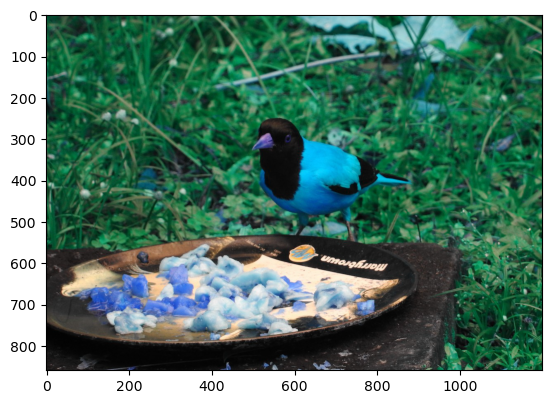

In [45]:
plt.imshow(dataset[0][0][:,:])

In [46]:
opt_dims

array([600., 800.])

In [47]:
# dataset[0][0] = cv2.resize(dataset[0][0], (int(opt_dims[1]), int(opt_dims[0])))
# plt.imshow(dataset[0][0])

In [48]:
# dataset[0][0].shape

In [49]:
for data in dataset:
    data[0] = cv2.resize(data[0], (int(opt_dims[1]), int(opt_dims[0])))

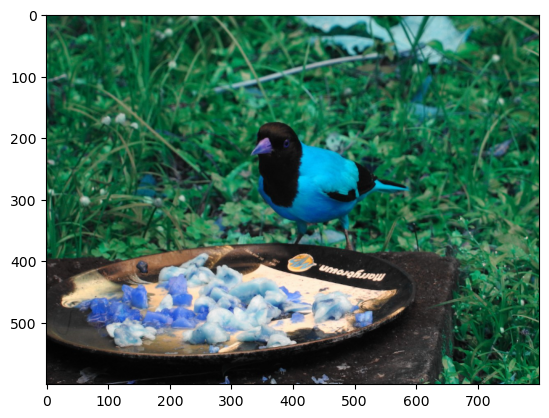

In [54]:
plt.imshow(dataset[0][0])